# Import Libraries / Environment Set Up:

In [43]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) # Optional, if you also want to see all rows

In [44]:
import kagglehub

path = kagglehub.dataset_download("artermiloff/steam-games-dataset")
print("Dataset downloaded to:", path)

Dataset downloaded to: C:\Users\oscar\.cache\kagglehub\datasets\artermiloff\steam-games-dataset\versions\2


In [45]:
df = pd.read_csv(os.path.join(path, 'games_march2025_cleaned.csv'))

df.head()

,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,score_rank,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,https://shared.akamai.steamstatic.com/store_it...,http://counter-strike.net/,NaN,NaN,True,False,True,0,NaN,1,4401572,Includes intense violence and blood.,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Indonesian']","[{'title': 'Buy Counter-Strike 2', 'descriptio...",['Valve'],['Valve'],"['Multi-player', 'Cross-Platform Multiplayer',...","['Action', 'Free To Play']",['https://shared.akamai.steamstatic.com/store_...,['http://video.akamai.steamstatic.com/store_tr...,0,NaN,7480813,1135108,100000000 - 200000000,33189,879,5174,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939,82,96473
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,https://shared.akamai.steamstatic.com/store_it...,https://www.pubg.com,https://support.pubg.com/hc/en-us,NaN,True,False,False,0,NaN,37,1732007,NaN,"['English', 'Korean', 'Simplified Chinese', 'F...",[],[],['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",['https://shared.akamai.steamstatic.com/store_...,[],0,NaN,1487960,1024436,50000000 - 100000000,0,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842,68,16720
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,https://shared.akamai.steamstatic.com/store_it...,http://www.dota2.com/,NaN,NaN,True,True,True,90,https://www.metacritic.com/game/pc/dota-2?ftag...,0,14337,"Dota 2 includes fantasy violence, use of alcoh...","['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...","[{'title': 'Buy Dota 2', 'description': '', 's...",['Valve'],['Valve'],"['Multi-player', 'Co-op', 'Steam Trading Cards...","['Action', 'Strategy', 'Free To Play']",['https://shared.akamai.steamstatic.com/store_...,['http://video.akamai.steamstatic.com/store_tr...,0,NaN,1998462,451338,200000000 - 500000000,43031,1536,898,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595,80,29366
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,https://shared.akamai.steamstatic.com/store_it...,https://www.rockstargames.com/V/,https://support.rockstargames.com,NaN,True,False,False,96,https://www.metacritic.com/game/pc/grand-theft...,77,1803063,NaN,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Spanish - Latin America']","[{'title': 'Buy Shark Cash Cards', 'descriptio...",['Rockstar North'],['Rockstar Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure']",['https://shared.akamai.steamstatic.com/store_...,['http://video.akamai.steamstatic.com/store_tr...,0,NaN,1719950,250012,50000000 - 100000000,19323,771,7101,74,0,117698,"{'Open World':

In [46]:
print(df.columns)
print("Column Counts: ", len(df.columns))

Index(['appid', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'discount',
       'peak_ccu', 'tags', 'pct_pos_total', 'num_reviews_total',
       'pct_pos_recent', 'num_reviews_recent'],
      dtype='object')
Column Counts:  47


# Data Preprocessing:

## Check for NA values:

In [47]:
df.isnull().sum()

appid                           0
name                            0
release_date                    0
required_age                    0
price                           0
dlc_count                       0
detailed_description          197
about_the_game                220
short_description             120
reviews                     79217
header_image                    0
website                     48504
support_url                 45508
support_email               10820
windows                         0
mac                             0
linux                           0
metacritic_score                0
metacritic_url              86071
achievements                    0
recommendations                 0
notes                       72975
supported_languages             0
full_audio_languages            0
packages                        0
developers                      0
publishers                      0
categories                      0
genres                          0
screenshots   

In [48]:
# Drop columns with any NA values and unnecessary columns
df.drop(columns=df.columns[df.isnull().any()], inplace=True)
df.drop(columns=['header_image', 'screenshots', 'movies'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89618 entries, 0 to 89617
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   appid                     89618 non-null  int64  
 1   name                      89618 non-null  object 
 2   release_date              89618 non-null  object 
 3   required_age              89618 non-null  int64  
 4   price                     89618 non-null  float64
 5   dlc_count                 89618 non-null  int64  
 6   windows                   89618 non-null  bool   
 7   mac                       89618 non-null  bool   
 8   linux                     89618 non-null  bool   
 9   metacritic_score          89618 non-null  int64  
 10  achievements              89618 non-null  int64  
 11  recommendations           89618 non-null  int64  
 12  supported_languages       89618 non-null  object 
 13  full_audio_languages      89618 non-null  object 
 14  packag

In [49]:
# Change 'release_date' to datetime and extract year and month to new columns for analysis
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

In [50]:
df.head()

,appid,name,release_date,required_age,price,dlc_count,windows,mac,linux,metacritic_score,achievements,recommendations,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,user_score,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,year,month
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,True,False,True,0,1,4401572,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Indonesian']","[{'title': 'Buy Counter-Strike 2', 'descriptio...",['Valve'],['Valve'],"['Multi-player', 'Cross-Platform Multiplayer',...","['Action', 'Free To Play']",0,7480813,1135108,100000000 - 200000000,33189,879,5174,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939,82,96473,2012,8
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,True,False,False,0,37,1732007,"['English', 'Korean', 'Simplified Chinese', 'F...",[],[],['PUBG Corporation'],"['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",0,1487960,1024436,50000000 - 100000000,0,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842,68,16720,2017,12
2,570,Dota 2,2013-07-09,0,0.00,2,True,True,True,90,0,14337,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...","[{'title': 'Buy Dota 2', 'description': '', 's...",['Valve'],['Valve'],"['Multi-player', 'Co-op', 'Steam Trading Cards...","['Action', 'Strategy', 'Free To Play']",0,1998462,451338,200000000 - 500000000,43031,1536,898,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595,80,29366,2013,7
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,True,False,False,96,77,1803063,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Spanish - Latin America']","[{'title': 'Buy Shark Cash Cards', 'descriptio...",['Rockstar North'],['Rockstar Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure']",0,1719950,250012,50000000 - 100000000,19323,771,7101,74,0,117698,"{'Open World': 32644, 'Action': 23539, 'Multip...",87,1803832,92,17517,2015,4
4,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,3.99,9,True,False,False,0,0,1165929,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'French', 'Italian', 'German', 'Sp...","[{'title': ""Buy Tom Clancy's Rainbow Six® Sieg...",['Ubisoft Montreal'],['Ubisoft'],"['Single-player', 'Multi-player', 'PvP', 'Onli...",['Action'],0,1152763,218446,20000000 - 50000000,14204,682,2434,306,80,89916,"{'FPS': 9831, 'PvP': 9162, 'e-sports': 9072, '...",84,1168020,76,12608,2015,12


In [51]:
df.columns
print("Column Counts: ", len(df.columns))

Column Counts:  36


# Exploratory Data Analysis:

In [52]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
appid,89618.0,1656903.958357,20.0,855052.5,1524730.0,2430852.5,3542350.0,916838.982016
release_date,89618,2021-04-06 09:27:35.587046912,1997-06-30 00:00:00,2018-12-07 00:00:00,2021-10-30 00:00:00,2023-12-14 00:00:00,2025-03-10 00:00:00,NaN
required_age,89618.0,0.183624,-1.0,0.0,0.0,0.0,21.0,1.725594
price,89618.0,7.309623,0.0,0.99,4.99,9.99,999.98,13.331073
dlc_count,89618.0,0.595583,0.0,0.0,0.0,0.0,3427.0,15.35192
metacritic_score,89618.0,2.903245,0.0,0.0,0.0,0.0,97.0,14.445358
achievements,89618.0,20.552333,0.0,0.0,5.0,20.0,9821.0,163.562418
recommendations,89618.0,1009.40108,0.0,0.0,0.0,0.0,4401572.0,22048.147658
user_score,89618.0,0.032817,0.0,0.0,0.0,0.0,100.0,1.615149
positive,89618.0,1269.895981,0.0,1.0,10.0,58.0,7480813.0,31814.411404


We noticed that **many varaibles have extreme outliers and some variables have some potential right-skewed distribution with values ranging from near zero to several million.** These **heavy-tailed distributions are common in real-world game data** because only a small number of titles become extremely successful, while most games receive far fewer players and reviews. Thats why we **applied log transformations to some variables** to correct extreme right-skew in several variables, reduce the influence of outliers, and linearize relationships for regression modeling.

## Apply Log Transformation

In [53]:
# Columns to log transform (using log1p because it handles zeros safely)
log_cols = [
    'peak_ccu',
    'num_reviews_total',
    'positive',
    'negative',
    'recommendations',
    'achievements',
    'dlc_count',
    'average_playtime_forever',
    'median_playtime_forever',
    'average_playtime_2weeks',
    'median_playtime_2weeks',
    'price'
]

# Create log-transformed columns
df_log = df.copy()
for col in log_cols:
    cleaned = df_log[col].where(df_log[col] >= 0, np.nan)
    df_log[f'log_{col}'] = np.log1p(cleaned)


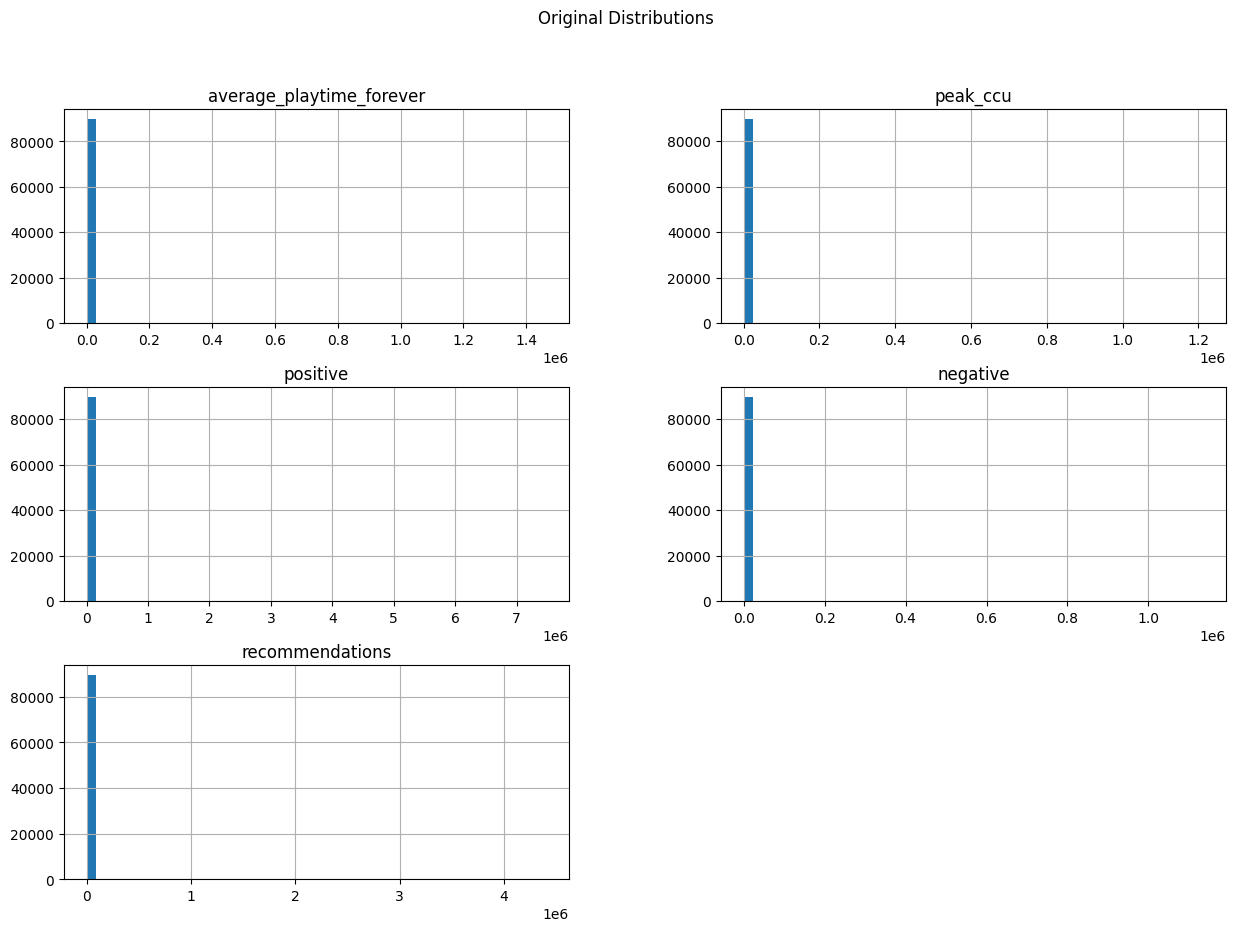

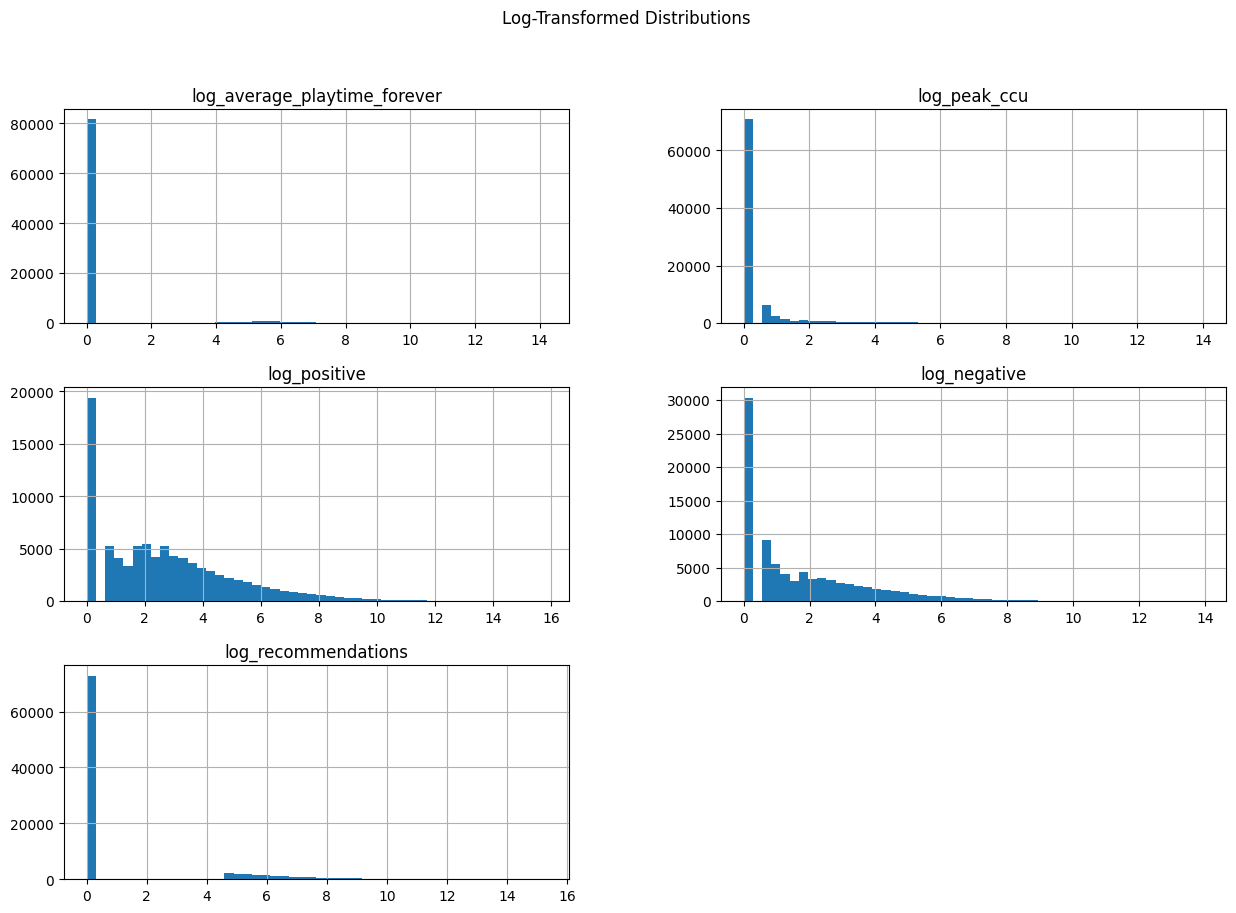

In [54]:
# variables we want to show
skewed_cols = ['average_playtime_forever', 'peak_ccu', 'positive', 'negative', 'recommendations']

# plot histograms for skewed columns
df[skewed_cols].hist(bins=50, figsize=(15, 10))
plt.suptitle('Original Distributions')
plt.show()

# Verify transformation
df_log[[f'log_{col}' for col in skewed_cols]].hist(bins=50, figsize=(15, 10))
plt.suptitle('Log-Transformed Distributions')
plt.show()

We can see log tranformation improved the distribution of many skewed variables.

## Finding the most reliable score from the dataset

### Distribution of Scores (user_score & metacritic_score)

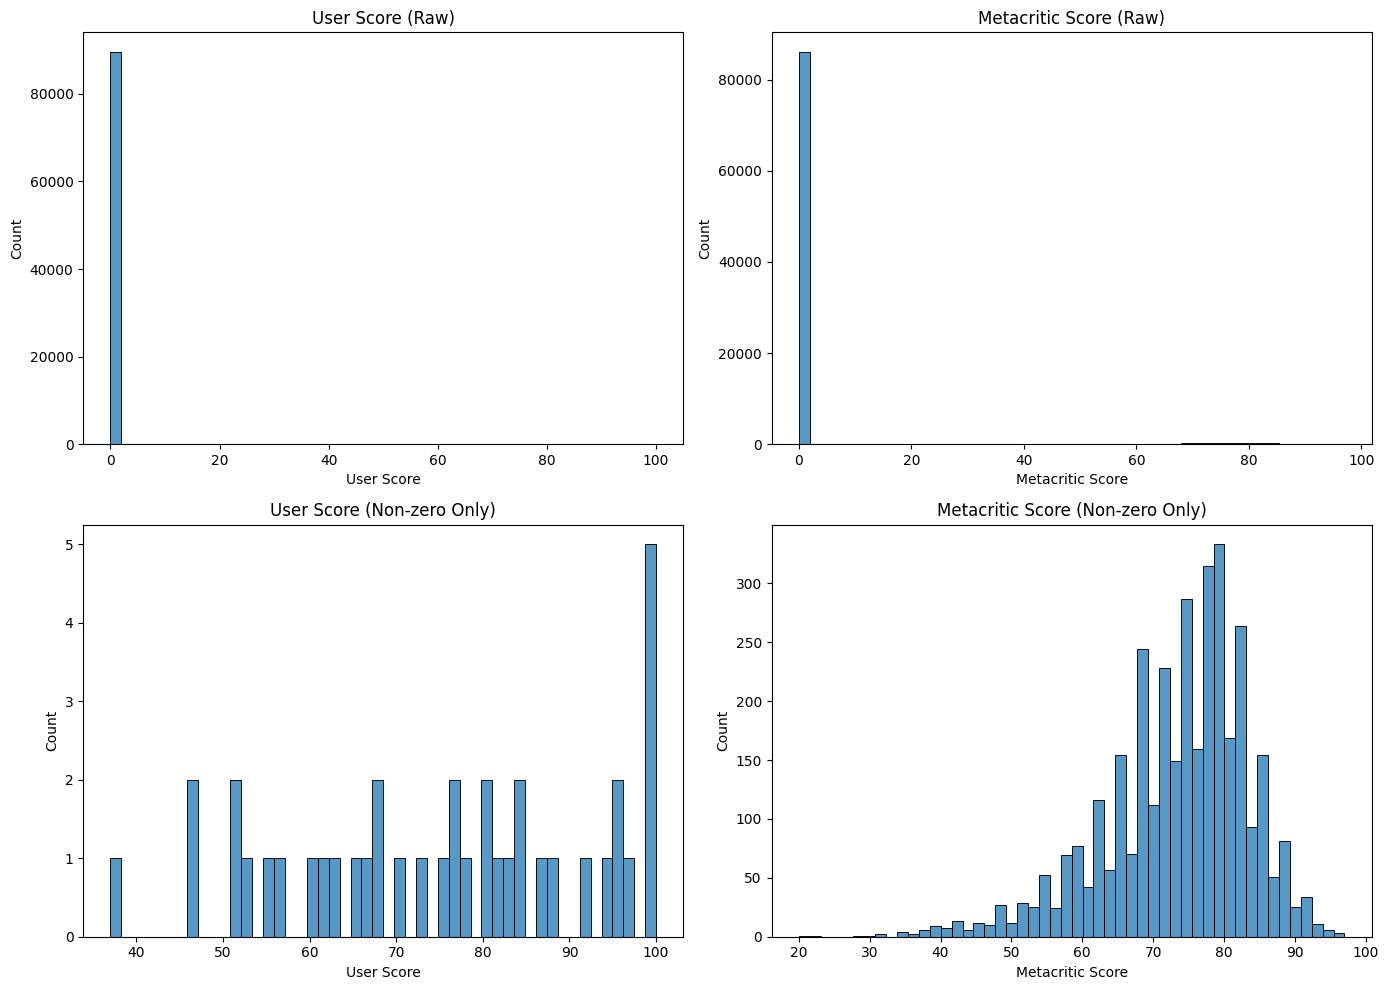

Non-zero user scores: 39 out of 89618
Non-zero metacritic scores: 3547 out of 89618


In [55]:
# Analysis of user_score and metacritic_score distributions
# Variables were not affect by log transformation, so we worked with the original df
user_nonzero = df.loc[df['user_score'] > 0, 'user_score']
meta_nonzero = df.loc[df['metacritic_score'] > 0, 'metacritic_score']

plt.figure(figsize=(14, 10))

# Raw distributions

plt.subplot(2, 2, 1)
sns.histplot(df['user_score'].dropna(), bins=50)
plt.title('User Score (Raw)')
plt.xlabel('User Score')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.histplot(df['metacritic_score'].dropna(), bins=50)
plt.title('Metacritic Score (Raw)')
plt.xlabel('Metacritic Score')
plt.ylabel('Count')

# Non-zero distributions

plt.subplot(2, 2, 3)
sns.histplot(user_nonzero, bins=50)
plt.title('User Score (Non-zero Only)')
plt.xlabel('User Score')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.histplot(meta_nonzero, bins=50)
plt.title('Metacritic Score (Non-zero Only)')
plt.xlabel('Metacritic Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

print(f"Non-zero user scores: {len(user_nonzero)} out of {len(df)}")
print(f"Non-zero metacritic scores: {len(meta_nonzero)} out of {len(df)}")

We can see from the score distributions that almost all Steam games have a user or Metacritic score of 0, and once these zeros are removed, only a very small number of games actually remain with valid ratings. A score of 0 is ambiguous because it may represent poor rating or simply indicate that the game has never been reviewed. Since few games have a real user or metacritic score and the meaning of 0 is unclear, these two variables are not reliable measures of game success.

### Analyzing pct_pos_total

In [56]:
# Analysis of pct_pos_total
# Variables were not affect by log transformation, so we worked with the original df
neg_count = (df['pct_pos_total'] < 0).sum()
total_count = df['pct_pos_total'].shape[0]

print(f"Games with pct_pos_total < 0 (missing/invalid): {neg_count} out of {total_count}")

Games with pct_pos_total < 0 (missing/invalid): 36419 out of 89618


`pct_pos_total` represents the percentage of positive user reviews out of all reviews a game has received. A value of −1 indicates that the game has never been rated, and this applies to almost half of the games in the dataset. This shows that a large portion of Steam games receive no user reviews at all, which has important implications for how we measure game success.

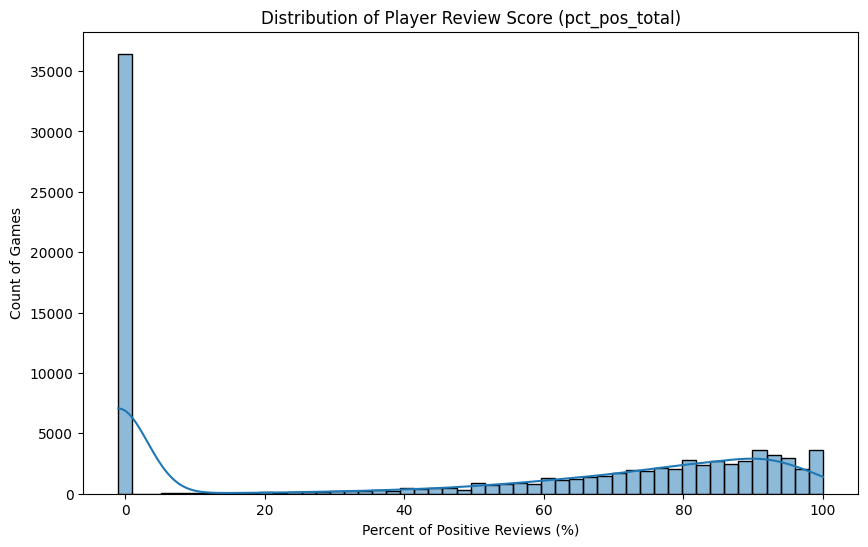

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(df['pct_pos_total'], bins=50, kde=True)
plt.title('Distribution of Player Review Score (pct_pos_total)')
plt.xlabel('Percent of Positive Reviews (%)')
plt.ylabel('Count of Games')
plt.show()

This plot shows the distribution of positive review percentages for games on Steam. We removed games with missing review data (where the score was recorded as −1) so that the distribution reflects only the ones that have actually been reviewed by players. Since our goal is to measure game success, it makes sense to focus on games with real user feedback, as successful games are more likely to have received ratings.

In [58]:
# Filter log-transformed df for pct_pos_total >= 0
df_log_pct_nonneg = df_log[df_log['pct_pos_total'] >= 0]

In [59]:
df_log_pct_nonneg.describe().T

,count,mean,min,25%,50%,75%,max,std
appid,53199.0,1449405.784507,20.0,682845.0,1307580.0,2177710.0,3530080.0,878064.136705
release_date,53199,2020-09-04 22:56:46.124175104,1997-06-30 00:00:00,2018-03-15 00:00:00,2021-02-22 00:00:00,2023-07-27 00:00:00,2025-03-10 00:00:00,NaN
required_age,53199.0,0.265174,-1.0,0.0,0.0,0.0,20.0,2.072405
price,53199.0,7.869111,0.0,0.99,4.99,9.99,199.99,11.348279
dlc_count,53199.0,0.856858,0.0,0.0,0.0,0.0,3427.0,19.002916
metacritic_score,53199.0,4.84932,0.0,0.0,0.0,0.0,97.0,18.42588
achievements,53199.0,29.094833,0.0,0.0,10.0,26.0,9821.0,210.760033
recommendations,53199.0,1680.021843,0.0,0.0,0.0,159.0,4401572.0,28378.861248
user_score,53199.0,0.054587,0.0,0.0,0.0,0.0,100.0,2.089907
positive,53199.0,2111.757326,0.0,12.0,36.0,182.0,7480813.0,41101.204221


pct_pos_total is a better rating than user_score and metacritic_score since it shows what percentage of reviews were positive and more games have this rating, but this can still be misleading when a game has only a few reviews. A game with three reviews could look “100% positive,” even though almost no one has actually played it. This is why it’s helpful to check how review counts relate to the positive-review percentage.

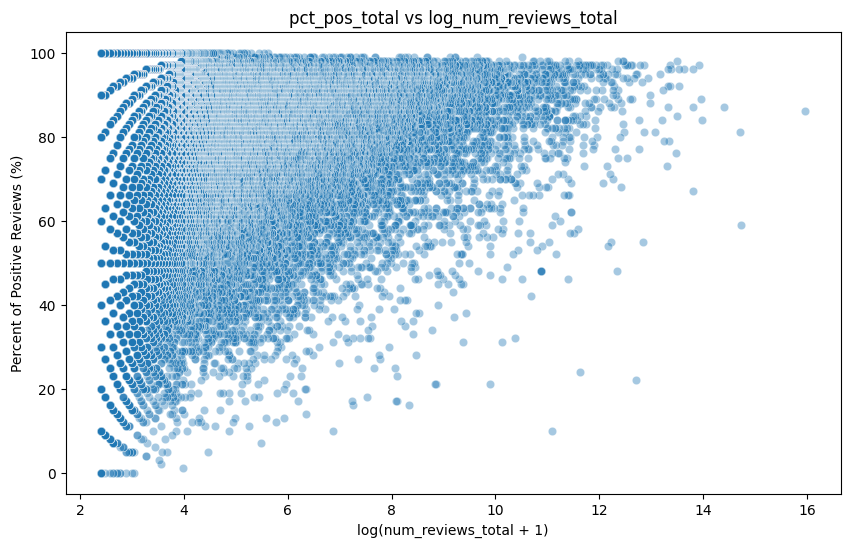

In [60]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_log_pct_nonneg,
    x='log_num_reviews_total',
    y='pct_pos_total',
    alpha=0.4
)

plt.title('pct_pos_total vs log_num_reviews_total')
plt.xlabel('log(num_reviews_total + 1)')
plt.ylabel('Percent of Positive Reviews (%)')
plt.show()

This plot shows that many games have 100% positive reviews simply because they have only a few reviews, which does not indicate true popularity. As review counts increase, scores stabilize between 70–95%, meaning large, well-known games rarely have extreme values. This confirms that pct_pos_total alone cannot measure game success, and variables like review volume or peak CCU are needed for a more accurate evaluation.

## What year and month was most of the games released? 

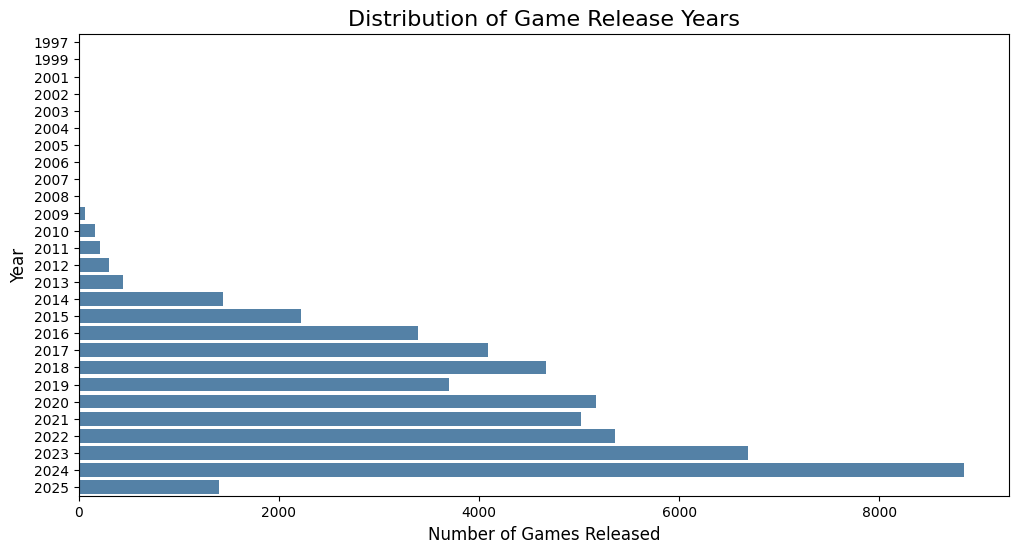

In [61]:
df = df_pct_nonneg

# Distribution of game release years
plt.figure(figsize=(12, 6))

sns.countplot(y='year', data=df, color='steelblue')

# plot's title and labels
plt.title('Distribution of Game Release Years', fontsize=16)
plt.xlabel('Number of Games Released', fontsize=12)
plt.ylabel('Year', fontsize=12)

plt.show()


We observe the increasing number of game releases over the years, it is clear that the gaming industry has grown significantly. This upward trend suggests that more developers are entering the market, with more titles being made available on platforms like Steam. The rise in game releases likely reflects a growing demand for gaming, making it a mainstream hobby. Gaming is no longer just a niche interest but a widely embraced pastime. We can see 2025 only has a small amount of numbers because this dataset was collected in March 2025, with only a quarter of 2025 has went through, which make sense why 2025 has a significant less amount of games.

## What is the popularity of different operating systems in the gaming community? 

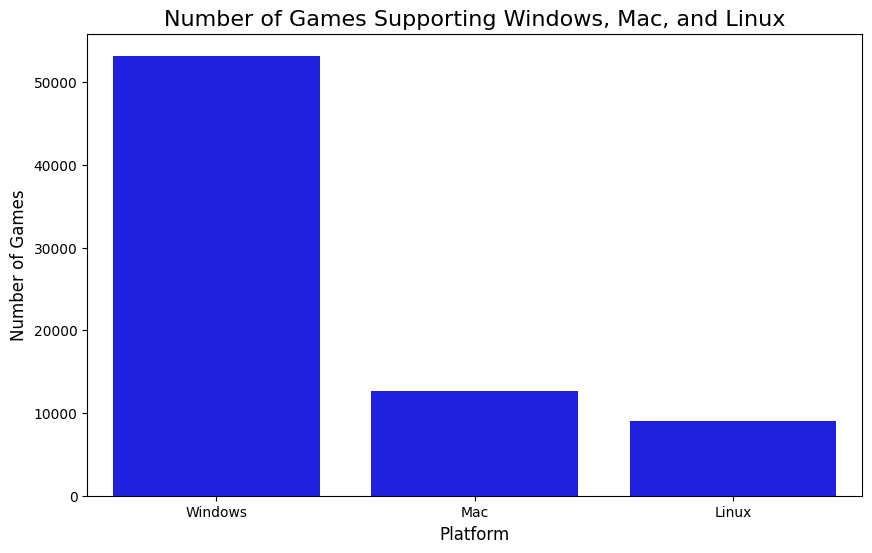

In [62]:
# Compare count between different avaliable OS Linux, Windows, or Mac
platform_counts = {
    'Windows': df['windows'].sum(),
    'Mac': df['mac'].sum(),
    'Linux': df['linux'].sum()
}

platform_df = pd.DataFrame(list(platform_counts.items()), columns=['Platform', 'Number of Games'])

# plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Number of Games', data=platform_df, color='blue')

# plot's title and labels
plt.title('Number of Games Supporting Windows, Mac, and Linux', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.show()



We can see Windows operating system has a significant majority of games compared to Mac and Linux. Windows dominates the gaming platform, with a significantly higher number of games supporting it compared to Mac and Linux. This is expected, as Windows has traditionally been the primary operating system for gaming due to its widespread adoption, compatibility with a wide range of games, and powerful hardware support. This also shows that overall Mac and Linux has smaller user bases in the gaming community. In addition, there is also a trend recently with developers releasing games that support multiple platforms making their games more global and diverse.

## Correlation Matrix between different variables

In [63]:
# Select log-transformed columns
log_cols = [f'log_{col}' for col in [
    'peak_ccu',
    'num_reviews_total',
    'positive',
    'negative',
    'recommendations',
    'achievements',
    'dlc_count',
    'average_playtime_forever',
    'median_playtime_forever',
    'average_playtime_2weeks',
    'median_playtime_2weeks',
    'price'
]]

# Non-log numeric features to include
other_cols = [
    'pct_pos_total',
    'pct_pos_recent',
    'discount',
    'required_age',
    'year',
    'month',
    'metacritic_score',
    'user_score'
]

corr_df = df_log_pct_nonneg[log_cols + other_cols].copy()


In [64]:
corr_matrix = corr_df.corr()

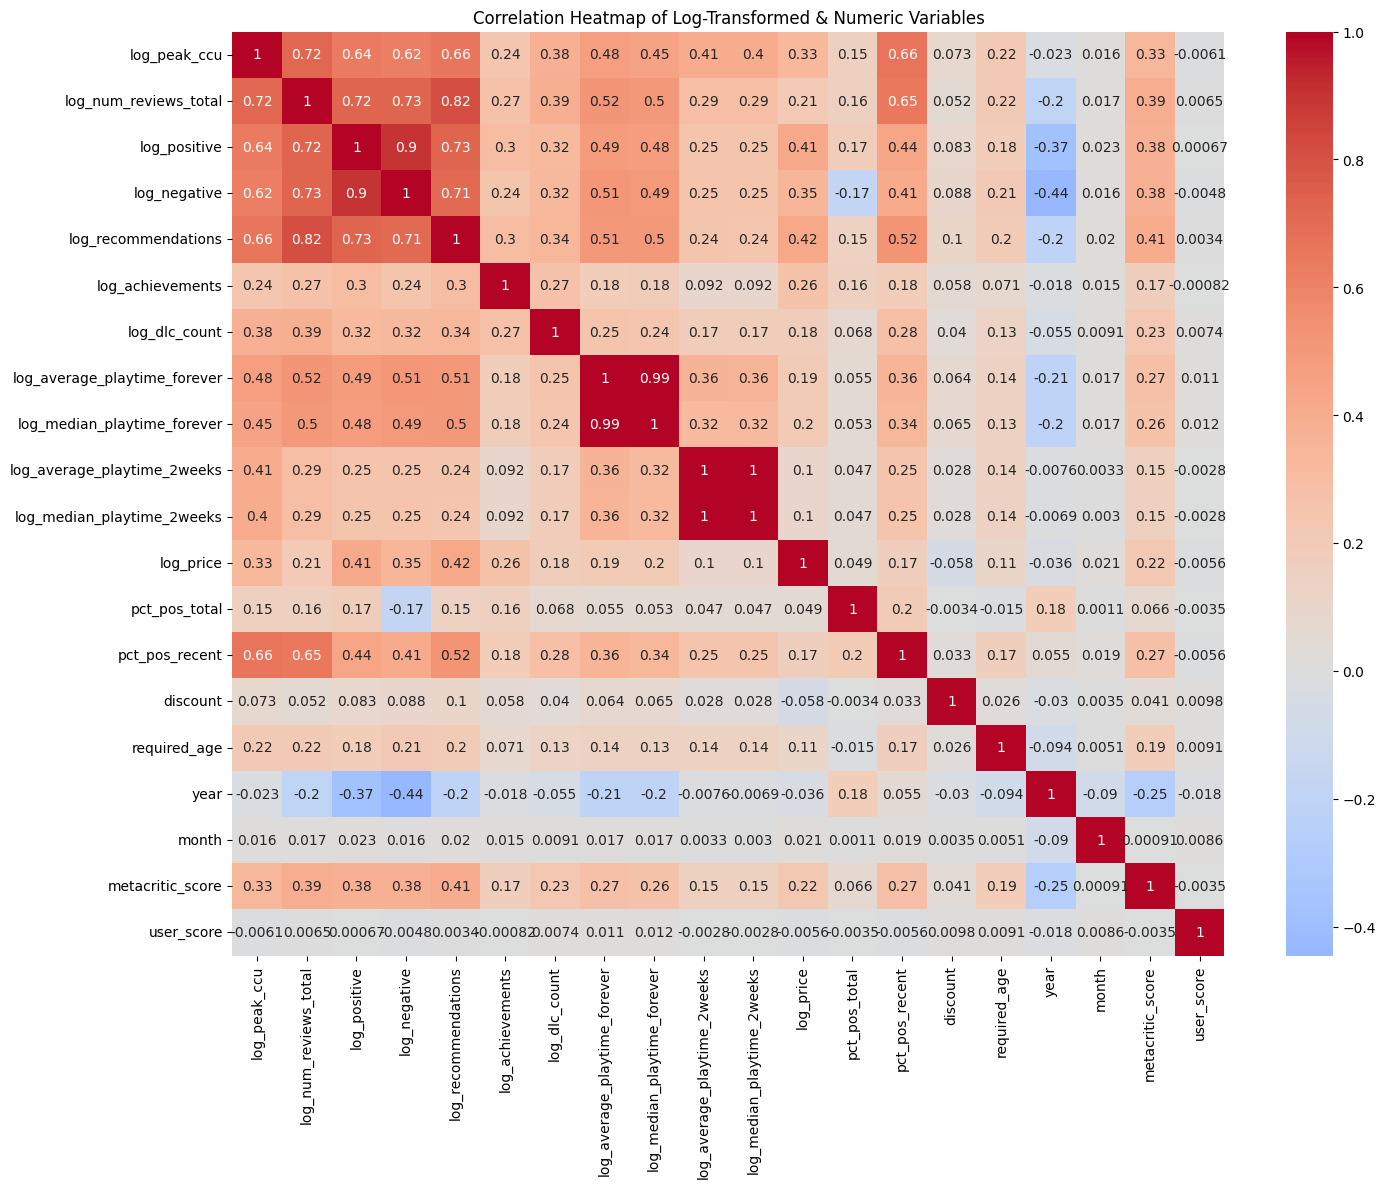

In [65]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Log-Transformed & Numeric Variables")
plt.show()

After applying log transformations to correct extreme skew, we generated a correlation heatmap to identify which variables are most strongly associated with peak concurrent users. The results show that review-related metrics have the highest correlations with game popularity: log-transformed total reviews (r = 0.72), recommendations (r = 0.66), positive reviews (r = 0.64), and negative reviews (r = 0.62). Long-term player engagement, measured through log average playtime (r = 0.48), also demonstrates a moderate positive relationship with peak CCU. Recent sentiment (pct_pos_recent) is more predictive of success than overall sentiment, suggesting momentum effects in player behavior. Conversely, variables such as required age, user score, discount percentage, and release month exhibit near-zero correlation and we are looking to exclude them from the model.

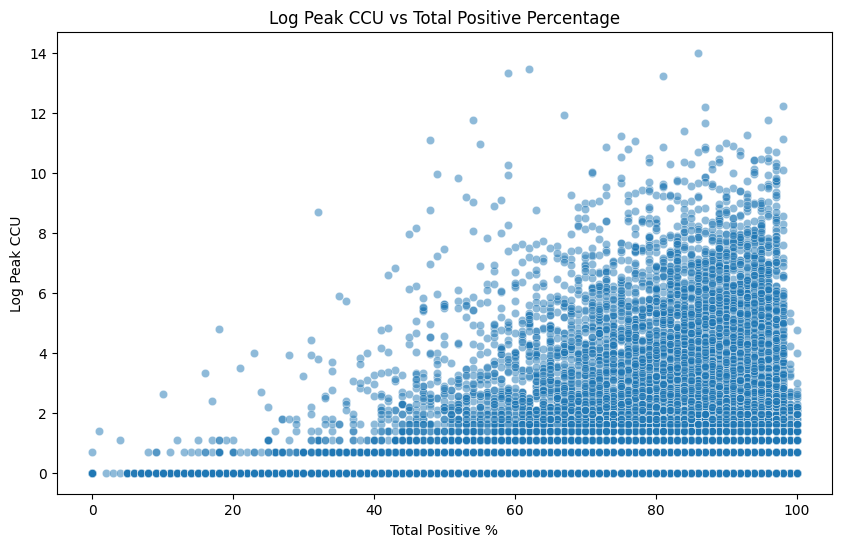

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_log_pct_nonneg, x='pct_pos_total', y='log_peak_ccu', alpha=0.5)
plt.title("Log Peak CCU vs Total Positive Percentage")
plt.xlabel("Total Positive %")
plt.ylabel("Log Peak CCU")
plt.show()

By comparing total positive review percentage to log peak concurrent users reveals only a weak relationship between overall sentiment and game success. While the most popular games tend to have positive review scores above 70%, many lesser-known titles also achieve very high positivity but remain far below the success threshold. This suggests that total positivity reflects user satisfaction but is not itself a strong driver of popularity. High ratings alone are insufficient to make a game successful. Many niche or indie games receive good ratings from a small audience, which explains why they appear on the right side (high %, low CCU).

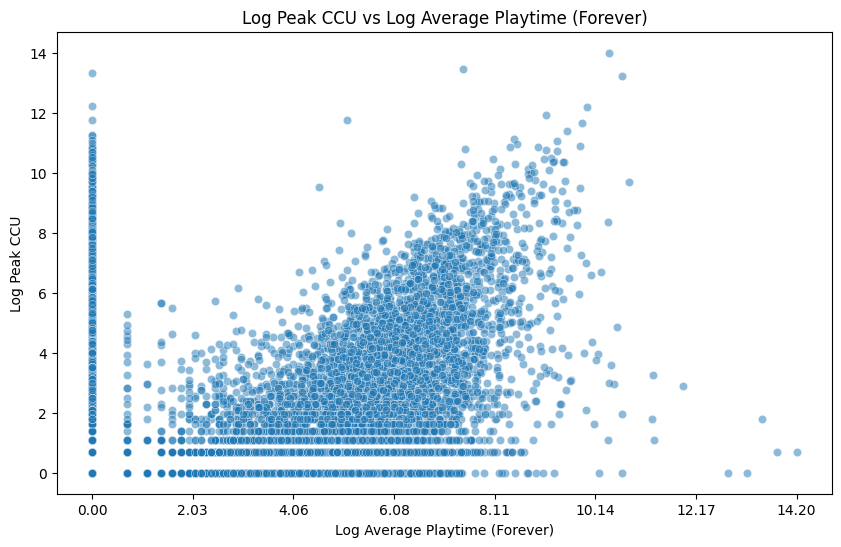

In [67]:
xmin = df_log_pct_nonneg['log_average_playtime_forever'].min()
xmax = df_log_pct_nonneg['log_average_playtime_forever'].max()

ticks = np.linspace(0, xmax, num=8)  # ensures 0 is included

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_log_pct_nonneg,
    x='log_average_playtime_forever',
    y='log_peak_ccu',
    alpha=0.5
)

plt.title("Log Peak CCU vs Log Average Playtime (Forever)")
plt.xlabel("Log Average Playtime (Forever)")
plt.ylabel("Log Peak CCU")

plt.xticks(ticks)

plt.show()




When looking at this graph, we can see that games with higher average playtime show a clear upward trend in peak concurrency, indicating that sustained player engagement is a key reason to popularity. The triangular distribution suggests increasing upper limits of peak CCU as playtime rises, even though not all highly played games achieve widespread popularity. The vertical cluster at zero playtime reflects the many games that fail to retain players at all, and those games that are new released with many users playing, but very little accumulated playtime.

## Linear Regression Model Fitting:

### Standardization

In [68]:
# from sklearn.preprocessing import StandardScaler

# X = df_log[[
#     'log_num_reviews_total',
#     'log_recommendations',
#     'log_positive',
#     'log_average_playtime_forever',
#     'pct_pos_recent',
#     'log_price',
#     'year'
# ]]

# y = df_log['log_peak_ccu']

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
